In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pylab as plt
from matplotlib.pyplot import imread
%matplotlib inline

In [2]:
from fbprophet import Prophet

In [3]:
#Reading data from csv file
df = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2019-08-12.csv')

In [4]:
#head of the data
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#converting UNIX epoch time to human readable date-time format

df['Timestamp'] = pd.to_datetime(df['Timestamp'],unit='s')

In [6]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,2011-12-31 07:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-12-31 07:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-12-31 07:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-12-31 07:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning 

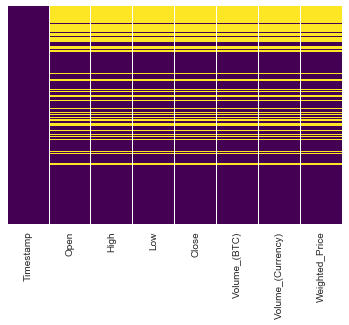

In [7]:
#Checking for missing value with heatmap of the data
sns.set_palette("husl")
sns.set_style('whitegrid')
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
#Make the Timestamp column as index
df.set_index('Timestamp', inplace=True)

Yellow lines are missing values in each rows and there are loads of them!
so we need to either drop them or fill them with mean or appropriate value


In [9]:
#Lets drop the NaN values from the table where all row values are NaN

df.dropna(axis=0, inplace = True)

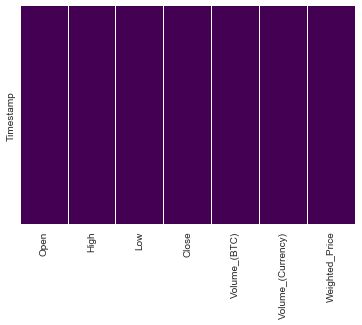

In [10]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

All missing data rows are gone 

In [11]:
df.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
2011-12-31 15:50:00,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
2011-12-31 16:59:00,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
2011-12-31 17:00:00,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
2012-01-01 04:16:00,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000


In [12]:
#info about data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2765819 entries, 2011-12-31 07:52:00 to 2019-08-12 00:00:00
Data columns (total 7 columns):
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
dtypes: float64(7)
memory usage: 168.8 MB


All columns' data type are float64 with datetime index 

In [13]:
#Descriptive Statistics of all columns of the data set
df.describe()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,2.765819e+06,2.765819e+06,2.765819e+06,2.765819e+06,2.765819e+06,2.765819e+06,2.765819e+06
mean,3.059659e+03,3.062027e+03,3.057022e+03,3.059638e+03,1.042232e+01,2.686812e+04,3.059499e+03
std,3.741168e+03,3.744835e+03,3.736985e+03,3.741134e+03,3.375010e+01,9.620425e+04,3.740910e+03
min,3.800000e+00,3.800000e+00,1.500000e+00,1.500000e+00,0.000000e+00,0.000000e+00,3.800000e+00
25%,3.742700e+02,3.745200e+02,3.740000e+02,3.742500e+02,4.530000e-01,2.865515e+02,3.742434e+02
50%,7.794500e+02,7.799100e+02,7.790100e+02,7.794900e+02,2.100451e+00,2.209966e+03,7.794137e+02
75%,5.635745e+03,5.639500e+03,5.631100e+03,5.635355e+03,8.179424e+00,1.554689e+04,5.635118e+03
max,1.966576e+04,1.966600e+04,1.964996e+04,1.966575e+04,5.853852e+03,7.569437e+06,1.966330e+04


In [14]:
# sns.set_palette("husl")
# sns.set_style('whitegrid')
# sns.pairplot(df)
# #sns.set(rc={'figure.figsize':(16,12)})

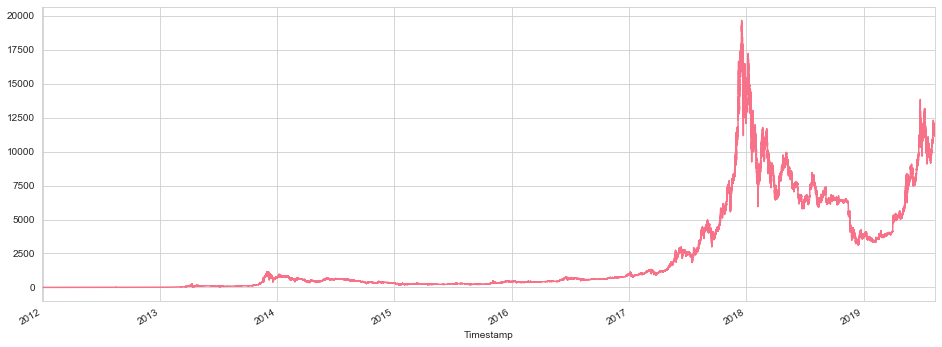

In [15]:
df['Weighted_Price'].plot(figsize=(16,6))

### ReSampling ( Daily )

In [16]:
df.resample(rule='D').mean()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603
2012-01-01,4.806667,4.806667,4.806667,4.806667,7.200667,35.259720,4.806667
2012-01-02,5.000000,5.000000,5.000000,5.000000,19.048000,95.240000,5.000000
2012-01-03,5.252500,5.252500,5.252500,5.252500,11.004660,58.100651,5.252500
2012-01-04,5.200000,5.223333,5.200000,5.223333,11.914807,63.119577,5.208159
...,...,...,...,...,...,...,...
2019-08-08,11802.089256,11808.993252,11794.461369,11802.458499,7.049661,83148.905377,11801.348742
2019-08-09,11820.178077,11826.725247,11813.025645,11820.708334,5.112833,60408.960125,11819.342193
2019-08-10,11579.977053,11584.982614,11573.482812,11579.683736,5.289239,61001.259165,11578.771029


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2765819 entries, 2011-12-31 07:52:00 to 2019-08-12 00:00:00
Data columns (total 7 columns):
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
dtypes: float64(7)
memory usage: 168.8 MB


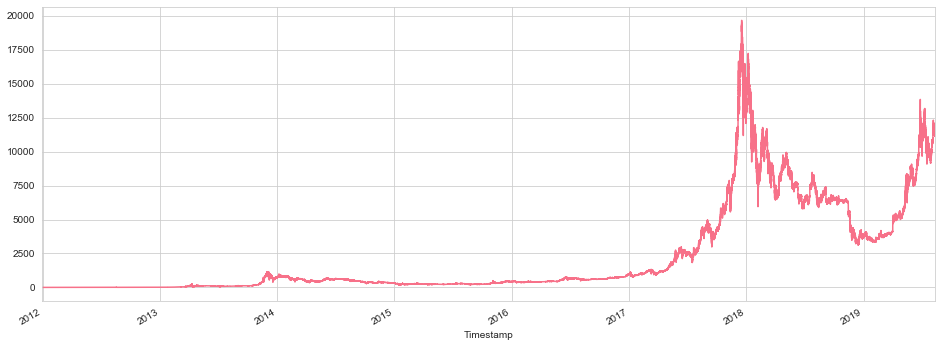

In [41]:
df['Weighted_Price'].plot(figsize=(16,6))

In [42]:
df.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
2011-12-31 15:50:00,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
2011-12-31 16:59:00,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
2011-12-31 17:00:00,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
2012-01-01 04:16:00,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000


In [18]:
dfwp = df['Weighted_Price']

In [19]:
dfwp

Timestamp
2011-12-31 07:52:00        4.390000
2011-12-31 15:50:00        4.390000
2011-12-31 16:59:00        4.526411
2011-12-31 17:00:00        4.580000
2012-01-01 04:16:00        4.580000
                           ...     
2019-08-11 23:56:00    11552.336234
2019-08-11 23:57:00    11555.520505
2019-08-11 23:58:00    11559.252199
2019-08-11 23:59:00    11575.638889
2019-08-12 00:00:00    11540.450291
Name: Weighted_Price, Length: 2765819, dtype: float64

## Forecasting 
### FBProphet

In [47]:
df1 = dfwp.resample(rule='D').mean()

In [48]:
df1

Timestamp
2011-12-31        4.471603
2012-01-01        4.806667
2012-01-02        5.000000
2012-01-03        5.252500
2012-01-04        5.208159
                  ...     
2019-08-08    11801.348742
2019-08-09    11819.342193
2019-08-10    11578.771029
2019-08-11    11378.232876
2019-08-12    11540.450291
Freq: D, Name: Weighted_Price, Length: 2782, dtype: float64

In [49]:
df1 = df1.reset_index()

In [51]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2782 entries, 0 to 2781
Data columns (total 2 columns):
Timestamp         2782 non-null datetime64[ns]
Weighted_Price    2779 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 43.6 KB


In [53]:
df1.columns = ['ds','y']

In [54]:
df1.head()

,ds,y
0,2011-12-31,4.471603
1,2012-01-01,4.806667
2,2012-01-02,5.000000
3,2012-01-03,5.252500
4,2012-01-04,5.208159


In [55]:
# This is fitting on all the data (no train test split in this example)
m = Prophet()
m.fit(df1)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
D:\Ana3\envs\tf_gpu4\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [63]:
future = m.make_future_dataframe(periods=24) #freq default daily

In [64]:
df1.tail()

,ds,y
2777,2019-08-08,11801.348742
2778,2019-08-09,11819.342193
2779,2019-08-10,11578.771029
2780,2019-08-11,11378.232876
2781,2019-08-12,11540.450291


In [65]:
future.tail()

,ds
2801,2019-09-01
2802,2019-09-02
2803,2019-09-03
2804,2019-09-04
2805,2019-09-05


In [66]:
len(df1)

2782

In [67]:
len(future)

2806

In [68]:
forecast = m.predict(future)

In [69]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2011-12-31,-101.345767,-1332.503452,2334.354566,-101.345767,-101.345767,631.637413,631.637413,631.637413,10.116670,10.116670,10.116670,621.520743,621.520743,621.520743,0.0,0.0,0.0,530.291646
1,2012-01-01,-100.714121,-1289.808408,2350.143260,-100.714121,-100.714121,597.613036,597.613036,597.613036,1.170598,1.170598,1.170598,596.442438,596.442438,596.442438,0.0,0.0,0.0,496.898915
2,2012-01-02,-100.082476,-1430.589239,2335.950618,-100.082476,-100.082476,580.791434,580.791434,580.791434,9.598073,9.598073,9.598073,571.193361,571.193361,571.193361,0.0,0.0,0.0,480.708958
3,2012-01-03,-99.450830,-1381.541203,2368.574623,-99.450830,-99.450830,543.089930,543.089930,543.089930,-2.889482,-2.889482,-2.889482,545.979412,545.979412,545.979412,0.0,0.0,0.0,443.639100
4,2012-01-04,-98.819185,-1350.794952,2157.068883,-98.819185,-98.819185,520.237828,520.237828,520.237828,-0.722897,-0.722897,-0.722897,520.960725,520.960725,520.960725,0.0,0.0,0.0,421.418643


In [70]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2801,2019-09-01,5492.735472,3285.423729,7007.160984,5492.735472,5492.735472,-318.569555,-318.569555,-318.569555,1.170598,1.170598,1.170598,-319.740153,-319.740153,-319.740153,0.0,0.0,0.0,5174.165917
2802,2019-09-02,5487.140715,3418.667777,6956.704600,5487.140715,5487.140715,-315.411098,-315.411098,-315.411098,9.598073,9.598073,9.598073,-325.009171,-325.009171,-325.009171,0.0,0.0,0.0,5171.729617
2803,2019-09-03,5481.545959,3342.087511,7037.442812,5481.545959,5481.545959,-332.045081,-332.045081,-332.045081,-2.889482,-2.889482,-2.889482,-329.155599,-329.155599,-329.155599,0.0,0.0,0.0,5149.500878
2804,2019-09-04,5475.951202,3367.768113,6936.458686,5475.951202,5476.076478,-333.088547,-333.088547,-333.088547,-0.722897,-0.722897,-0.722897,-332.365651,-332.365651,-332.365651,0.0,0.0,0.0,5142.862655
2805,2019-09-05,5470.356446,3412.246707,6897.246773,5470.356446,5470.996184,-340.976584,-340.976584,-340.976584,-6.146692,-6.146692,-6.146692,-334.829892,-334.829892,-334.829892,0.0,0.0,0.0,5129.379862


In [71]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [72]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
2794,2019-08-25,5294.504173,3464.115095,6987.474313
2795,2019-08-26,5280.204613,3298.649925,7052.220246
2796,2019-08-27,5246.961133,3409.002680,7022.881340
2797,2019-08-28,5230.295462,3459.142550,7117.157002
2798,2019-08-29,5207.885877,3216.810947,7031.670309
2799,2019-08-30,5187.662707,3430.678953,6963.327163
2800,2019-08-31,5195.276085,3370.294524,6883.226807
2801,2019-09-01,5174.165917,3285.423729,7007.160984
2802,2019-09-02,5171.729617,3418.667777,6956.704600
2803,2019-09-03,5149.500878,3342.087511,7037.442812


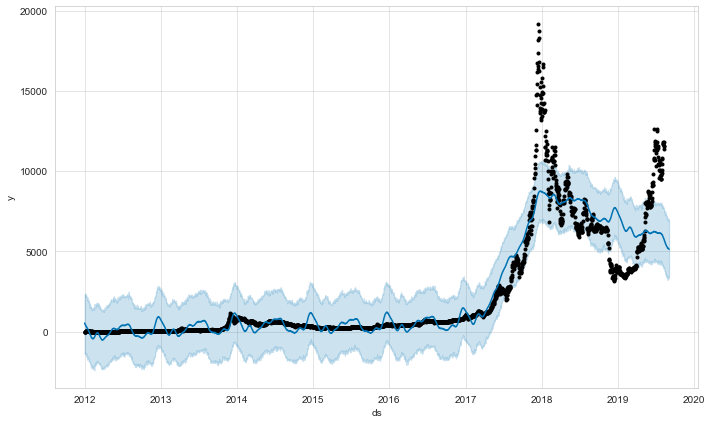

In [73]:
m.plot(forecast);

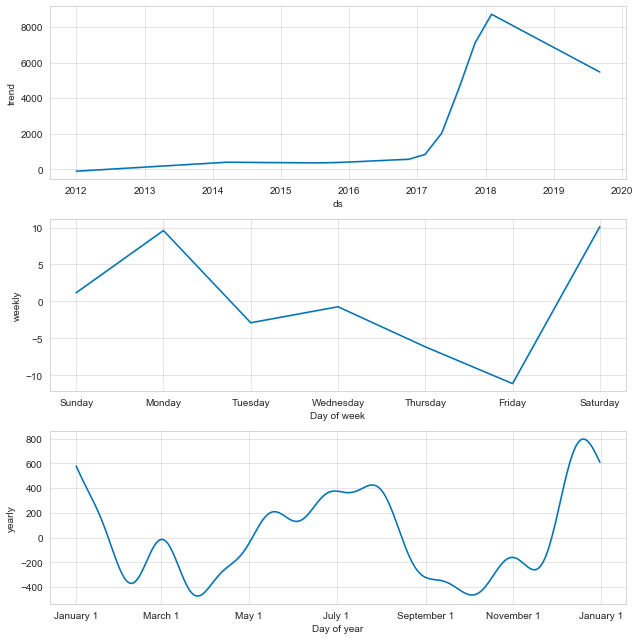

In [74]:
m.plot_components(forecast);

# Resampling Monthly 

In [20]:
df2 = dfwp.resample(rule='MS').mean()

In [21]:
df2.head()

Timestamp
2011-12-01    4.471603
2012-01-01    6.345955
2012-02-01    5.228443
2012-03-01    4.984397
2012-04-01    4.995091
Freq: MS, Name: Weighted_Price, dtype: float64

In [28]:
df2 = df2.reset_index()

In [29]:
df2

,Timestamp,Weighted_Price
0,2011-12-01,4.471603
1,2012-01-01,6.345955
2,2012-02-01,5.228443
3,2012-03-01,4.984397
4,2012-04-01,4.995091
...,...,...
88,2019-04-01,5139.112145
89,2019-05-01,7234.325315
90,2019-06-01,9361.787472
91,2019-07-01,10671.368501


In [30]:
df2.columns = ['ds','y']

In [31]:
df2.head()

,ds,y
0,2011-12-01,4.471603
1,2012-01-01,6.345955
2,2012-02-01,5.228443
3,2012-03-01,4.984397
4,2012-04-01,4.995091


In [33]:
pd.plotting.register_matplotlib_converters()

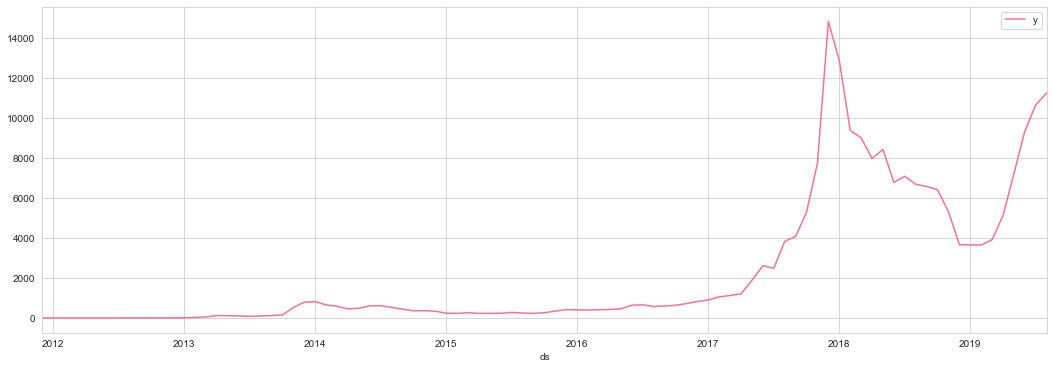

In [34]:
df2.plot(x='ds',y='y',figsize=(18,6))

In [36]:
len(df2) -12

81

In [39]:
train = df2.iloc[:81]
test = df2.iloc[81:]

In [40]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=12,freq='MS')
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
D:\Ana3\envs\tf_gpu4\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [43]:
forecast.tail(12)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
81,2018-09-01,8086.115360,5798.684396,9791.040309,8084.713040,8086.799144,-316.009460,-316.009460,-316.009460,-316.009460,-316.009460,-316.009460,0.0,0.0,0.0,7770.105900
82,2018-10-01,8338.893687,6273.678343,10084.763675,8329.649417,8346.045283,-192.693735,-192.693735,-192.693735,-192.693735,-192.693735,-192.693735,0.0,0.0,0.0,8146.199952
83,2018-11-01,8600.097957,6904.506060,10839.121661,8578.556886,8616.542965,191.526506,191.526506,191.526506,191.526506,191.526506,191.526506,0.0,0.0,0.0,8791.624463
84,2018-12-01,8852.876283,8030.515600,11833.643070,8817.561793,8879.203158,1059.595573,1059.595573,1059.595573,1059.595573,1059.595573,1059.595573,0.0,0.0,0.0,9912.471857
85,2019-01-01,9114.080554,7873.653172,11753.601233,9063.645487,9152.504764,725.039989,725.039989,725.039989,725.039989,725.039989,725.039989,0.0,0.0,0.0,9839.120543
86,2019-02-01,9375.284824,7600.969455,11503.023022,9302.407550,9430.317435,204.010123,204.010123,204.010123,204.010123,204.010123,204.010123,0.0,0.0,0.0,9579.294947
87,2019-03-01,9611.211262,7791.719504,11840.213638,9519.280264,9680.934210,304.859694,304.859694,304.859694,304.859694,304.859694,304.859694,0.0,0.0,0.0,9916.070956
88,2019-04-01,9872.415532,7839.827496,11689.264529,9760.378802,9957.231177,-163.069784,-163.069784,-163.069784,-163.069784,-163.069784,-163.069784,0.0,0.0,0.0,9709.345748
89,2019-05-01,10125.193858,8227.196545,12145.667208,9993.481989,10229.613043,-53.471034,-53.471034,-53.471034,-53.471034,-53.471034,-53.471034,0.0,0.0,0.0,10071.722824
90,2019-06-01,10386.398129,7923.299576,11799.458669,10227.739019,10512.054536,-529.856334,-529.856334,-529.856334,-529.856334,-529.856334,-529.856334,0.0,0.0,0.0,9856.541795


In [44]:
test.tail(12)

,ds,y
81,2018-09-01,6586.987311
82,2018-10-01,6416.713230
83,2018-11-01,5321.281997
84,2018-12-01,3672.419306
85,2019-01-01,3659.467919
86,2019-02-01,3653.638677
87,2019-03-01,3919.370872
88,2019-04-01,5139.112145
89,2019-05-01,7234.325315
90,2019-06-01,9361.787472


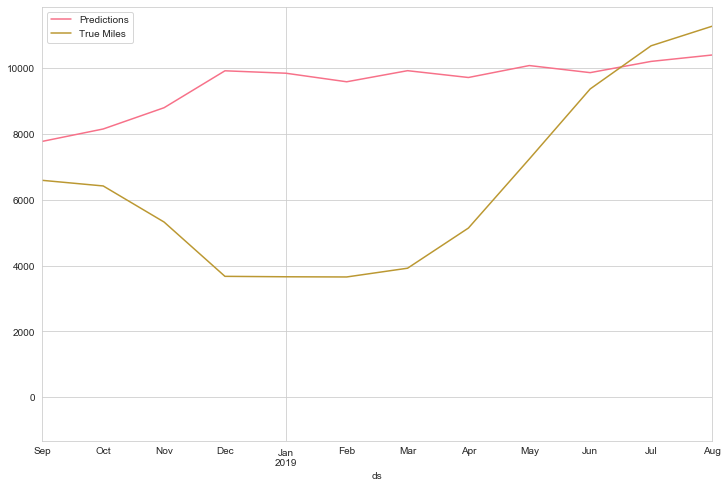

In [45]:
ax = forecast.plot(x='ds',y='yhat',label='Predictions',legend=True,figsize=(12,8))

test.plot(x='ds',y='y',label='True Miles',legend=True,ax=ax,xlim=('2018-09-01','2019-08-01'))

In [46]:
from statsmodels.tools.eval_measures import rmse

In [47]:
predictions = forecast.iloc[-12:]['yhat']
predictions

81     7770.105900
82     8146.199952
83     8791.624463
84     9912.471857
85     9839.120543
86     9579.294947
87     9916.070956
88     9709.345748
89    10071.722824
90     9856.541795
91    10197.476285
92    10391.597492
Name: yhat, dtype: float64

In [48]:
test['y']

81     6586.987311
82     6416.713230
83     5321.281997
84     3672.419306
85     3659.467919
86     3653.638677
87     3919.370872
88     5139.112145
89     7234.325315
90     9361.787472
91    10671.368501
92    11263.834561
Name: y, dtype: float64

In [49]:
rmse(predictions,test['y'])

4029.0855067967213

Slightly off but still reasonable predictons